#Install Library

In [ ]:
import os
import random
import gdown
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sn
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lisaamatul","key":"025ceeb6e9e042a283760bd539bfcbe2"}'}

#Collect Dataset

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d agungmrf/indonesian-sign-language-bisindo
!mkdir dataset
!unzip -qq indonesian-sign-language-bisindo.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/agungmrf/indonesian-sign-language-bisindo
License(s): unknown
100% 1.36G/1.36G [01:00<00:00, 28.6MB/s]
100% 1.36G/1.36G [01:00<00:00, 24.2MB/s]


In [ ]:
INPUT_SIZE = (224, 224)
BATCH_SIZE = 32
TRAIN_DIR = '/content/dataset/bisindo/images/train'
VALIDATION_DIR = '/content/dataset/bisindo/images/val'

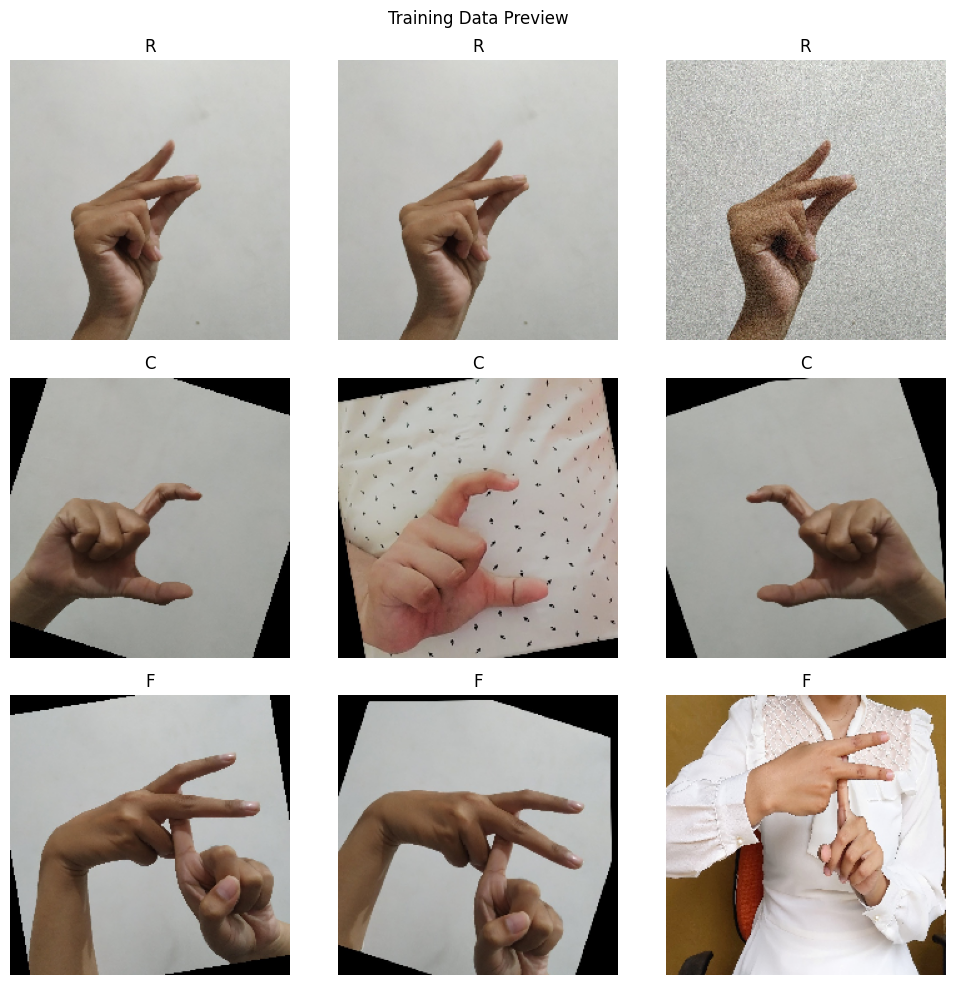

In [ ]:
labels = os.listdir(TRAIN_DIR)
plt.figure(figsize=(10, 10))
num_rows = 3
num_cols = 3

for i, label in enumerate(labels):
    label_dir = os.path.join(TRAIN_DIR, label)
    images = os.listdir(label_dir)
    selected_images = random.sample(images, 9)
    for j, image_name in enumerate(selected_images):
        if i * num_cols + j >= num_rows * num_cols:
            break
        image_path = os.path.join(label_dir, image_name)
        img = image.load_img(image_path, target_size=(224, 224))
        plt.subplot(num_rows, num_cols, i * num_cols + j + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')

plt.suptitle('Training Data Preview')
plt.tight_layout()
plt.show()

#Preprocessing Data

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size=INPUT_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=INPUT_SIZE,
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='categorical')

Found 9169 images belonging to 26 classes.
Found 2301 images belonging to 26 classes.


In [ ]:
NUM_CLASSES = len(train_generator.class_indices)
NUM_CLASSES

26

#Build Model

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(INPUT_SIZE[0], INPUT_SIZE[1], 3))
base_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step
